In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t)) + np.sin(2*np.pi*100e3*t)

In [82]:
spectrogram.shape

(1000, 1024)

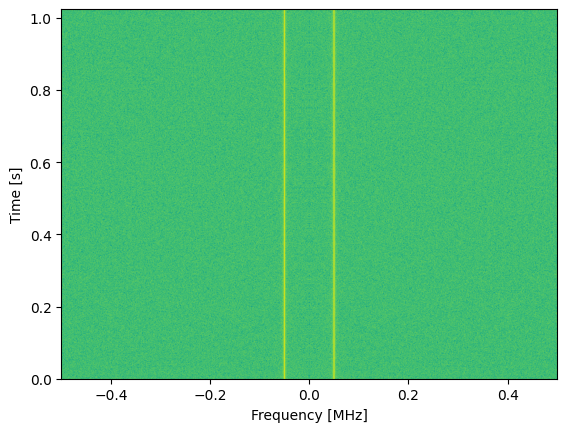

In [79]:
# simulate the signal above, or use your own signal

fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

In [48]:
def create_spectrogram(signal, fft_size):
    num_rows = len(x) // fft_size # // is an integer division which rounds down
    spectrogram = np.zeros((num_rows, fft_size))
    for i in range(num_rows):
        spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)
    return spectrogram

In [49]:
def plot_spectrogram(spectrogram, sample_rate, MHz = False):
    if MHz:
        spectrogram_boundary = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate]
    else:
        spectrogram_boundary = [sample_rate/-2, sample_rate/2, 0, len(x)/sample_rate]
    
    plt.imshow(spectrogram, aspect='auto', extent = spectrogram_boundary)
    plt.xlabel(f"Frequency [{'MHz' if MHz else 'Hz'}]")
    plt.ylabel("Time [s]")
    plt.show()

In [52]:
s = create_spectrogram(x, 2**10)

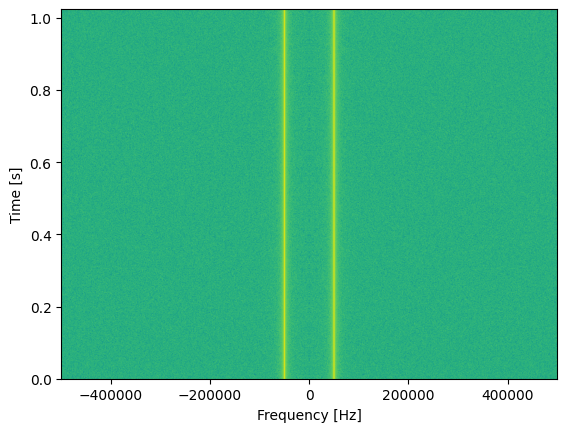

In [53]:
plot_spectrogram(s, sample_rate)

In [54]:
2**10

1024